Работа с NumPy

In [ ]:
import numpy as np

matrix = np.array([[4, 5, 0], [9, 9, 9]])
print("matrix = \n", matrix, "\n")

tmatrix = matrix.T
print("tmatrix = \n", tmatrix, "\n")

vector = np.ravel(matrix)
print("vector = \n", vector, "\n")

tvector = np.reshape(vector, (6, 1))
print("tvector = \n", tvector, "\n")

list_matrix = list(matrix)
print("list_matrix = \n", list_matrix, "\n")

str_matrix = str(matrix)
print("matrix as str = \n", str_matrix, "\n")

print("matrix type is", type(matrix), "\n")

print("vector type is", type(vector), "\n")

print("list_matrix type is", type(list_matrix), "\n")

print("str_matrix type is", type(str_matrix), "\n")

formatted_vector = "; ".join(map(str, vector))
print("formatted_vector = \n", formatted_vector, "\n")

Работа с Pandas DataFrame

https://pandas.pydata.org/docs/user_guide/10min.html

Работа с данными - чтение и запись CSV

In [2]:
import pandas as pd

df = pd.read_csv("data/titanic.csv", index_col="PassengerId")

df.to_csv("test.csv")

Работа с данными - основные команды

In [ ]:
df.info()

print(df.describe().transpose())

cleared_df = df.drop(["Name", "Ticket", "Embarked"], axis=1)
print(cleared_df.head())
print(cleared_df.tail())

sorted_df = cleared_df.sort_values(by="Age")
print(sorted_df.head())
print(sorted_df.tail())

Работа с данными - работа с элементами

In [ ]:
print(df["Age"])

print(df.loc[100])

print(df.loc[100, "Name"])

print(df.loc[100:200, ["Age", "Name"]])

print(df[0:3])

print(df.iloc[0])

print(df.iloc[3:5, 0:2])

print(df.iloc[[3, 4], [0, 1]])

Работа с данными - отбор и группировка

In [ ]:
s_values = df["Sex"].unique()
print(s_values)

s_total = 0
for s_value in s_values:
    count = df[df["Sex"] == s_value].shape[0]
    s_total += count
    print(s_value, "count =", count)
print("Total count = ", s_total)

print(df.groupby(["Pclass", "Survived"]).size().reset_index(name="Count")) # type: ignore

Визуализация - Исходные данные

In [4]:
data = df[["Pclass", "Survived", "Age"]].copy()
data.dropna(subset=["Age"], inplace=True)
print(data)

             Pclass  Survived   Age
PassengerId                        
1                 3         0  22.0
2                 1         1  38.0
3                 3         1  26.0
4                 1         1  35.0
5                 3         0  35.0
...             ...       ...   ...
886               3         0  39.0
887               2         0  27.0
888               1         1  19.0
890               1         1  26.0
891               3         0  32.0

[714 rows x 3 columns]


Визуализация - Сводка пяти чисел

<img src="assets/quantile.png" width="400" style="background-color: white">

In [9]:
def q1(x):
    return x.quantile(0.25)


# median = quantile(0.5)
def q2(x):
    return x.quantile(0.5)


def q3(x):
    return x.quantile(0.75)


def iqr(x):
    return q3(x) - q1(x)


def low_iqr(x):
    return max(0, q1(x) - 1.5 * iqr(x))


def high_iqr(x):
    return q3(x) + 1.5 * iqr(x)


quantiles = data[["Pclass", "Age"]].groupby(["Pclass"]).aggregate(["min", q1, q2, "median", q3, "max"])
print(quantiles)

iqrs = data[["Pclass", "Age"]].groupby(["Pclass"]).aggregate([low_iqr, iqr, high_iqr])
print(iqrs)

data.boxplot(column="Age", by="Pclass")

KeyError: 'Pclass'

Визуализация - Гистограмма

In [ ]:
data.plot.hist(column=["Age"], bins=80)

Визуализация - Точечная диаграмма

<Axes: xlabel='Pclass', ylabel='Age'>

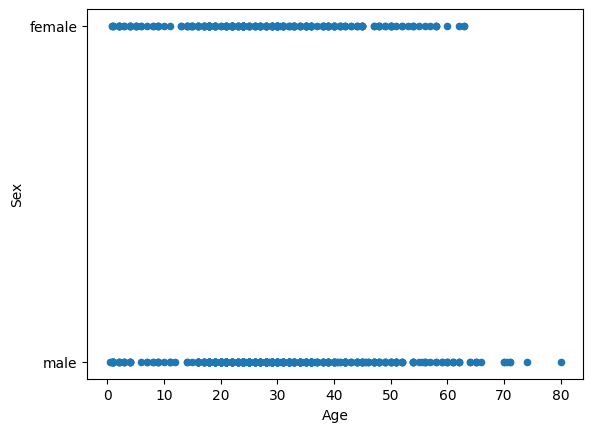

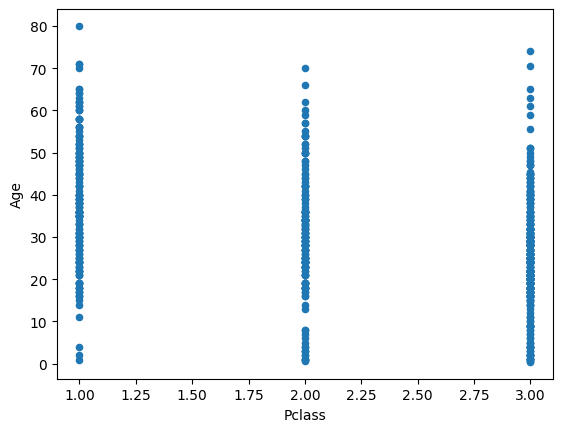

In [10]:
df.plot.scatter(x="Age", y="Sex")

df.plot.scatter(x="Pclass", y="Age")

Визуализация - Столбчатая диаграмма

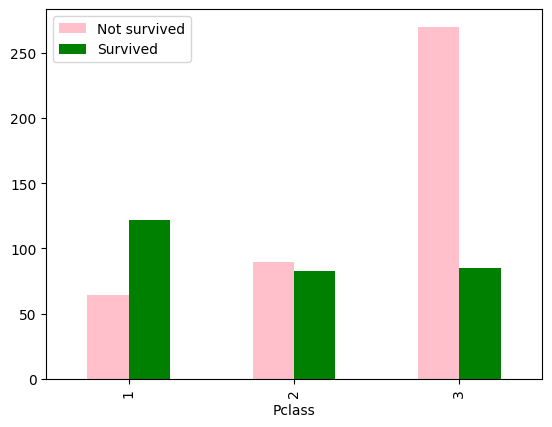

In [13]:
plot = data.groupby(["Pclass", "Survived"]).size().unstack().plot.bar(color=["pink", "green"])
plot.legend(["Not survived", "Survived"])

Визуализация - Временные ряды

        my_date  my_value bullet bulletClass label       date
0    28.03.2023   76.5662    NaN         NaN   NaN 2023-03-28
1    31.03.2023   77.0863    NaN         NaN   NaN 2023-03-31
2    01.04.2023   77.3233    NaN         NaN   NaN 2023-04-01
3    04.04.2023   77.9510    NaN         NaN   NaN 2023-04-04
4    05.04.2023   79.3563    NaN         NaN   NaN 2023-04-05
..          ...       ...    ...         ...   ...        ...
238  20.03.2024   92.2243    NaN         NaN   NaN 2024-03-20
239  21.03.2024   92.6861    NaN         NaN   NaN 2024-03-21
240  22.03.2024   91.9499    NaN         NaN   NaN 2024-03-22
241  23.03.2024   92.6118    NaN         NaN   NaN 2024-03-23
242  26.03.2024   92.7761    NaN         NaN   NaN 2024-03-26

[243 rows x 6 columns]


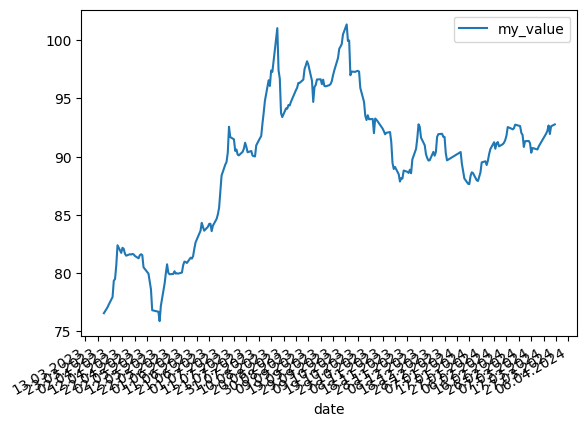

In [20]:
from datetime import datetime
import matplotlib.dates as md

ts = pd.read_csv("data/dollar.csv")
ts["date"] = ts.apply(lambda row: datetime.strptime(row["my_date"], "%d.%m.%Y"), axis=1) # создали новый столбец дэйт, с помощью эплай достучались до всех строк, лямбда выражение принимает одну строку ну и переделали из строки в нормальную дату


print(ts)

plot = ts.plot.line(x="date", y="my_value")
plot.xaxis.set_major_locator(md.DayLocator(interval=10)) #ставим интервал по времени в 10 дней
plot.xaxis.set_major_formatter(md.DateFormatter("%d.%m.%Y")) # определяем формат даты
plot.tick_params(axis="x", labelrotation=90) # угол поворота подписей нижней оси